In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr
import itertools

In [52]:
measures = ["degree", "neighbor_degree", "closeness", "betweenness", "harmonic", "eigenvector", "pagerank", "uplift_eigenvector", "hypercoreness"]
# measures = ["degree", "neighbor_degree", "closeness", "betweenness", "harmonic", "eigenvector", "pagerank", "hypercoreness"]
datasets = ["email-enron"]

In [53]:
values_by_dataset = {dataset: [] for dataset in datasets}

for dataset in datasets:
    for measure in measures:
        values = np.load(f"values/{dataset}/node_{measure}.npy")
        values_by_dataset[dataset].append(values)

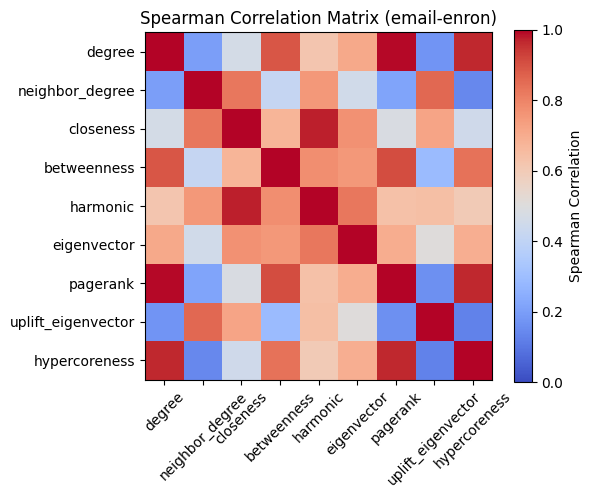

In [54]:
n = len(measures)

for dataset in datasets:
    corr_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            rho, _ = spearmanr(values_by_dataset[dataset][i], values_by_dataset[dataset][j])
            corr_matrix[i, j] = rho

    plt.figure(figsize=(6, 5))
    im = plt.imshow(corr_matrix, cmap='coolwarm', vmin=0, vmax=1)
    plt.colorbar(im, label='Spearman Correlation')
    plt.xticks(range(n), measures, rotation=45)
    plt.yticks(range(n), measures)
    plt.title(f"Spearman Correlation Matrix ({dataset})")
    plt.tight_layout()
    plt.show()
    plt.savefig(f"figures/spearman_correlation_matrix_{dataset}.png")
    plt.close()

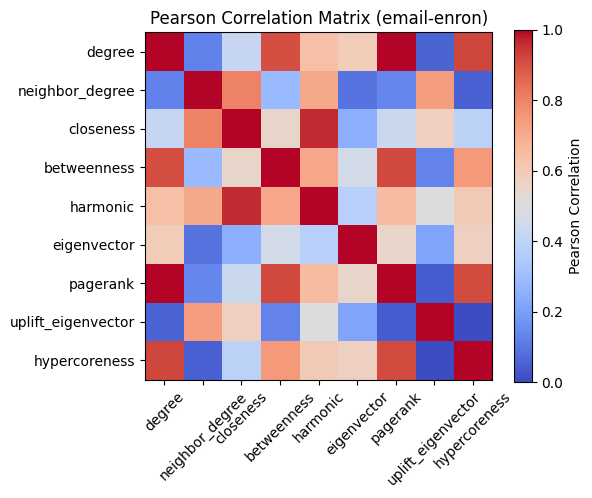

In [55]:
n = len(measures)

for dataset in datasets:
    corr_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            rho, _ = pearsonr(values_by_dataset[dataset][i], values_by_dataset[dataset][j])
            corr_matrix[i, j] = rho

    plt.figure(figsize=(6, 5))
    im = plt.imshow(corr_matrix, cmap='coolwarm', vmin=0, vmax=1)
    plt.colorbar(im, label='Pearson Correlation')
    plt.xticks(range(n), measures, rotation=45)
    plt.yticks(range(n), measures)
    plt.title(f"Pearson Correlation Matrix ({dataset})")
    plt.tight_layout()
    plt.show()
    plt.savefig(f"figures/pearson_correlation_matrix_{dataset}.png")
    plt.close()

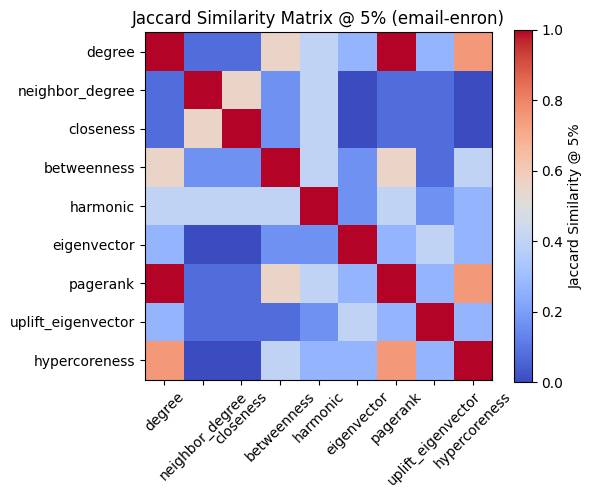

In [56]:
for dataset in datasets:
    jaccard_matrix = np.zeros((n, n))
    scores = values_by_dataset[dataset]

    # number of top items to consider (10% of nodes)
    num_items = len(scores[0])
    k = max(1, int(num_items * 0.05))

    for i in range(n):
        # get indices of top-k items for method i
        top_i = set(np.argsort(scores[i])[::-1][:k])
        for j in range(n):
            top_j = set(np.argsort(scores[j])[::-1][:k])
            # Jaccard similarity
            intersection = len(top_i & top_j)
            union = len(top_i | top_j)
            jaccard_matrix[i, j] = intersection / union if union > 0 else 0.0

    plt.figure(figsize=(6, 5))
    im = plt.imshow(jaccard_matrix, cmap='coolwarm', vmin=0, vmax=1)
    plt.colorbar(im, label='Jaccard Similarity @ 5%')
    plt.xticks(range(n), measures, rotation=45)
    plt.yticks(range(n), measures)
    plt.title(f"Jaccard Similarity Matrix @ 5% ({dataset})")
    plt.tight_layout()
    plt.show()
    plt.savefig(f"figures/jaccard_similarity_matrix_{dataset}.png")
    plt.close()

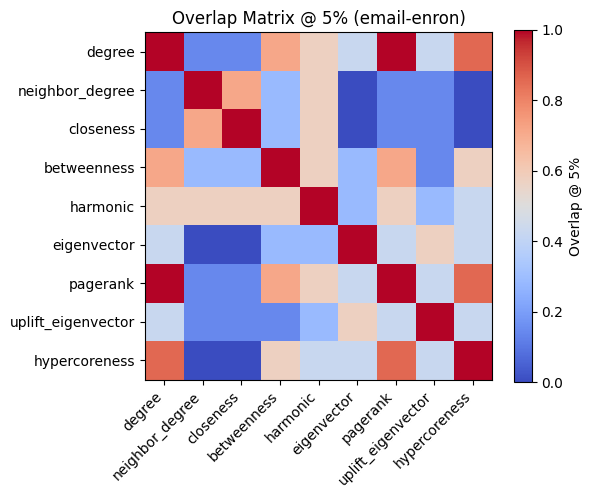

In [57]:
for dataset in datasets:
    overlap_matrix = np.zeros((n, n))
    scores = values_by_dataset[dataset]

    # size of the top list: 10% of items (at least 1)
    num_items = len(scores[0])
    k = max(1, int(round(num_items * 0.05)))

    # precompute top-k index sets for speed
    topk_sets = []
    for i in range(n):
        # argsort descending, take top-k indices
        topk = set(np.argsort(scores[i])[::-1][:k])
        topk_sets.append(topk)

    for i in range(n):
        Ti = topk_sets[i]
        for j in range(n):
            Tj = topk_sets[j]
            inter = len(Ti & Tj)
            overlap_matrix[i, j] = inter / k  # since |Ti| = |Tj| = k

    plt.figure(figsize=(6, 5))
    im = plt.imshow(overlap_matrix, cmap='coolwarm', vmin=0, vmax=1)
    plt.colorbar(im, label='Overlap @ 5%')
    plt.xticks(range(n), measures, rotation=45, ha='right')
    plt.yticks(range(n), measures)
    plt.title(f"Overlap Matrix @ 5% ({dataset})")
    plt.tight_layout()
    plt.show()
    plt.savefig(f"figures/overlap_matrix_{dataset}.png")
    plt.close()
    

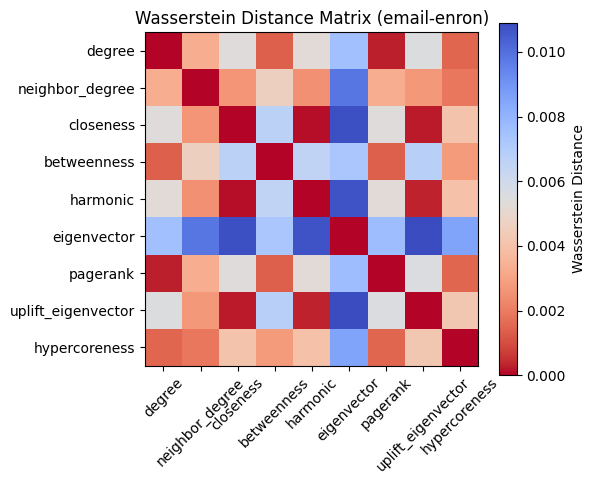

In [58]:
n = len(measures)

for dataset in datasets:
    corr_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            rho = wasserstein_distance(values_by_dataset[dataset][i], values_by_dataset[dataset][j])
            corr_matrix[i, j] = rho

    plt.figure(figsize=(6, 5))
    im = plt.imshow(corr_matrix, cmap='coolwarm_r')
    plt.colorbar(im, label='Wasserstein Distance')
    plt.xticks(range(n), measures, rotation=45)
    plt.yticks(range(n), measures)
    plt.title(f"Wasserstein Distance Matrix ({dataset})")
    plt.tight_layout()
    plt.show()
    plt.savefig(f"figures/wasserstein_distance_matrix_{dataset}.png")
    plt.close()